# Banking Customer Churn Prediction



In [38]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sb
import imblearn


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\luisd\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [11]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [12]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


KeyboardInterrupt: 

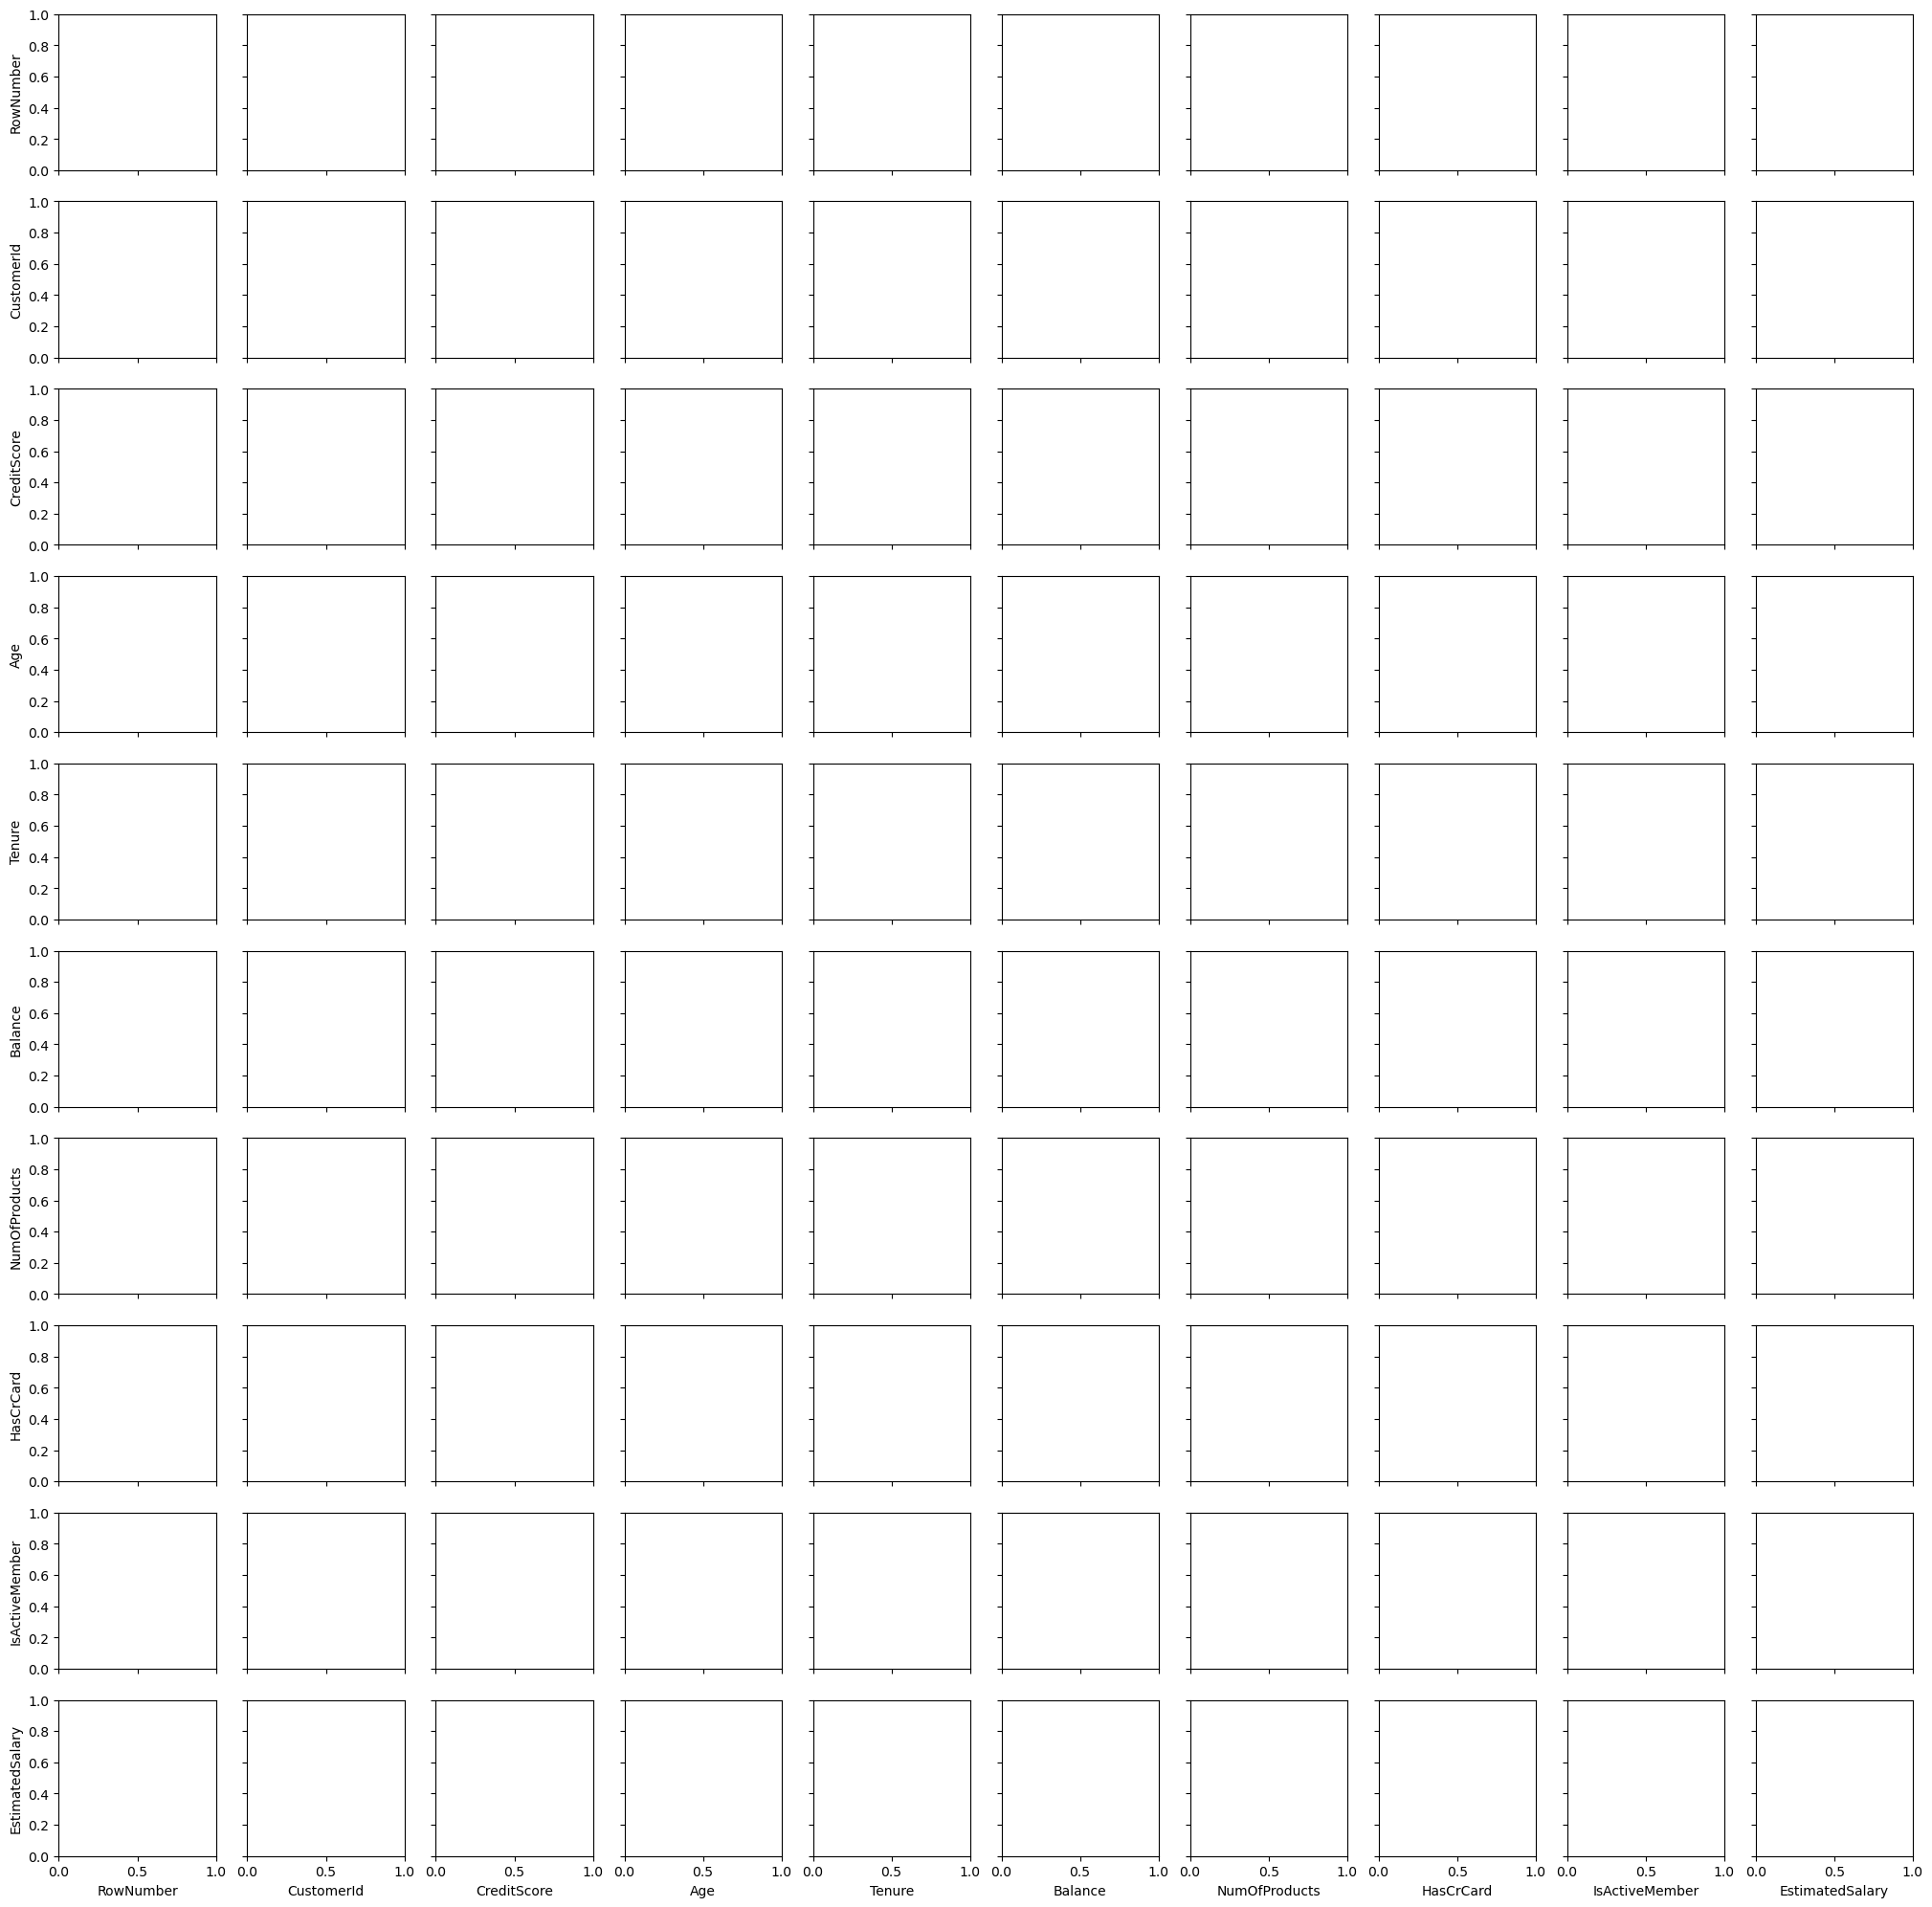

In [5]:
sb.pairplot(dataset, hue='Exited')

In [13]:
dataset['Gender'] = (dataset['Gender'] == "Male").astype(int)

In [14]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [15]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:

# Mapping the country to the minimum salary
country_salaries = {'France': 1540 * 12, 'Spain': 1050 * 12, 'Germany': 1580 * 12}

# Remove rows with 'EstimatedSalary' less than 1000
dataset = dataset[dataset['EstimatedSalary'] >= 1000]

# Multiply 'EstimatedSalary' by 12 if it's less than the corresponding country's salary
dataset.loc[dataset['EstimatedSalary'] < dataset['Geography'].map(country_salaries), 'EstimatedSalary'] *= 12



In [17]:
dataset.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,650.502766,0.545921,38.912383,5.009758,76542.359520,1.530530,0.705563,0.514536,108570.666002,0.203601
std,96.628097,0.497912,10.486845,2.891708,62382.531671,0.582092,0.455812,0.499814,53133.092269,0.402696
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12028.680000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,62811.030000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97259.250000,1.000000,1.000000,1.000000,107994.990000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127678.800000,2.000000,1.000000,1.000000,153727.320000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,227066.160000,1.000000


In [18]:
# Mapping countries to integers
countries = {'France': 0, 'Spain': 1, 'Germany': 2}
dataset['Geography'] = dataset['Geography'].map(countries)

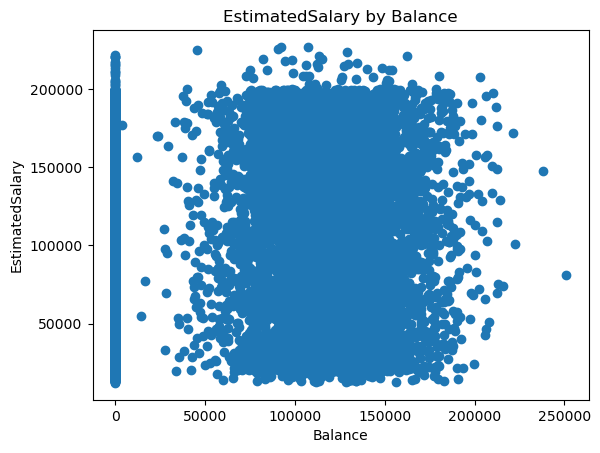

In [19]:
plt.scatter(dataset['Balance'], dataset['EstimatedSalary'])
plt.xlabel('Balance')
plt.ylabel('EstimatedSalary')
plt.title('EstimatedSalary by Balance')
plt.show()

In [20]:
newFile = open('cleaned_dataset.csv', 'w')
dataset.to_csv(newFile, index=False)

dataset = pd.read_csv('cleaned_dataset.csv')

In [21]:
dataset.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000
mean,650.354115,0.749074,0.545165,38.939918,5.004938,76404.556093,1.532305,0.704527,0.514095,108590.957891,0.204321
std,96.713973,0.829974,0.497982,10.511876,2.888428,62369.559606,0.583218,0.456279,0.499827,53117.992541,0.403225
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12028.680000,0.000000
25%,583.000000,0.000000,0.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,62881.852500,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97070.055000,1.000000,1.000000,1.000000,108037.230000,0.000000
75%,717.000000,2.000000,1.000000,44.000000,7.000000,127656.530000,2.000000,1.000000,1.000000,153594.180000,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,227066.160000,1.000000


In [22]:
# We can extract the data in this format from pandas like this:
all_inputs = dataset[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].values

# Similarly, we can extract the class labels
all_labels = dataset['Exited'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:10]

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, 2.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0134888e+05],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, 1.0000000e+00,
        8.3807860e+04, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, 8.0000000e+00,
        1.5966080e+05, 3.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.1393157e+05],
       [6.9900000e+02, 0.0000000e+00, 3.9000000e+01, 1.0000000e+00,
        0.0000000e+00, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.3826630e+04],
       [8.5000000e+02, 0.0000000e+00, 4.3000000e+01, 2.0000000e+00,
        1.2551082e+05, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        7.9084100e+04],
       [6.4500000e+02, 1.0000000e+00, 4.4000000e+01, 8.0000000e+00,
        1.1375578e+05, 2.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.4975671e+05],
       [8.2200000e+02, 1.0000000e+00, 5.

In [23]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

# Decision trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

# Print performance metrics: (performance during learning, confusion matrix, precision, recall, accuracy, F1 measure)
from sklearn.metrics import classification_report, confusion_matrix

predictions = decision_tree_classifier.predict(testing_inputs)

print(confusion_matrix(testing_classes, predictions))
print(classification_report(testing_classes, predictions))



[[1645  282]
 [ 255  248]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1927
           1       0.47      0.49      0.48       503

    accuracy                           0.78      2430
   macro avg       0.67      0.67      0.67      2430
weighted avg       0.78      0.78      0.78      2430



# Decision tree with balanced dataset

In [29]:

smt = SMOTE(random_state=5)

X = dataset.drop('Exited', axis=1)
y = dataset['Exited']

X, y = smt.fit_sample(X, y)
final_dataset = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

final_dataset.head()

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\luisd\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

(array([  6.,  22.,  52., 120., 224., 276., 156., 105.,  31.,   8.]),
 array([0.75462591, 0.75973451, 0.76484312, 0.76995173, 0.77506034,
        0.78016895, 0.78527755, 0.79038616, 0.79549477, 0.80060338,
        0.80571199]),
 <BarContainer object of 10 artists>)

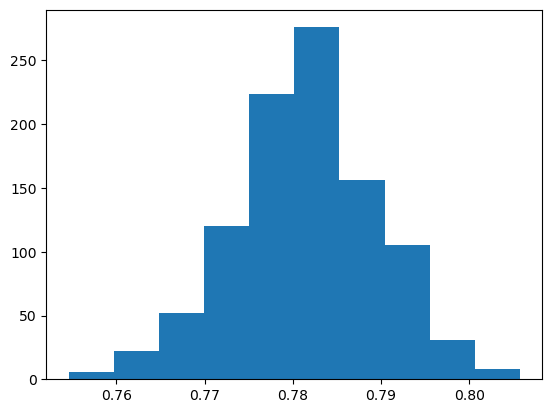

In [88]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
plt.hist(model_accuracies)

In [89]:
# Using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(training_inputs, training_classes)
knn_classifier.score(testing_inputs, testing_classes)



0.7558326629123089